In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_test=pd.read_csv('C:\\Users\\user\\Desktop\\test_lAUu6dG.csv')
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
test_original=df_test.copy()

In [4]:
df_test['Dependents'].replace('3+', 3,inplace=True) 


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0],inplace=True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(),inplace=True)

In [10]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [11]:
df_train=pd.read_csv('C:\\Users\\user\\Desktop\\train_ctrUa4K.csv')
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
train_original=df_train.copy()

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df_train['Dependents'].replace('3+', 3,inplace=True)  
df_train['Loan_Status'].replace('N', 0,inplace=True) 
df_train['Loan_Status'].replace('Y', 1,inplace=True)

In [16]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df_test.shape,df_train.shape

((367, 12), (614, 13))

In [18]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(),inplace=True)

In [20]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df_train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

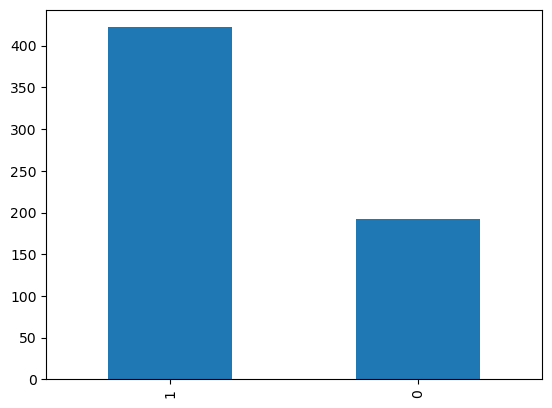

In [22]:
df_train['Loan_Status'].value_counts().plot.bar()

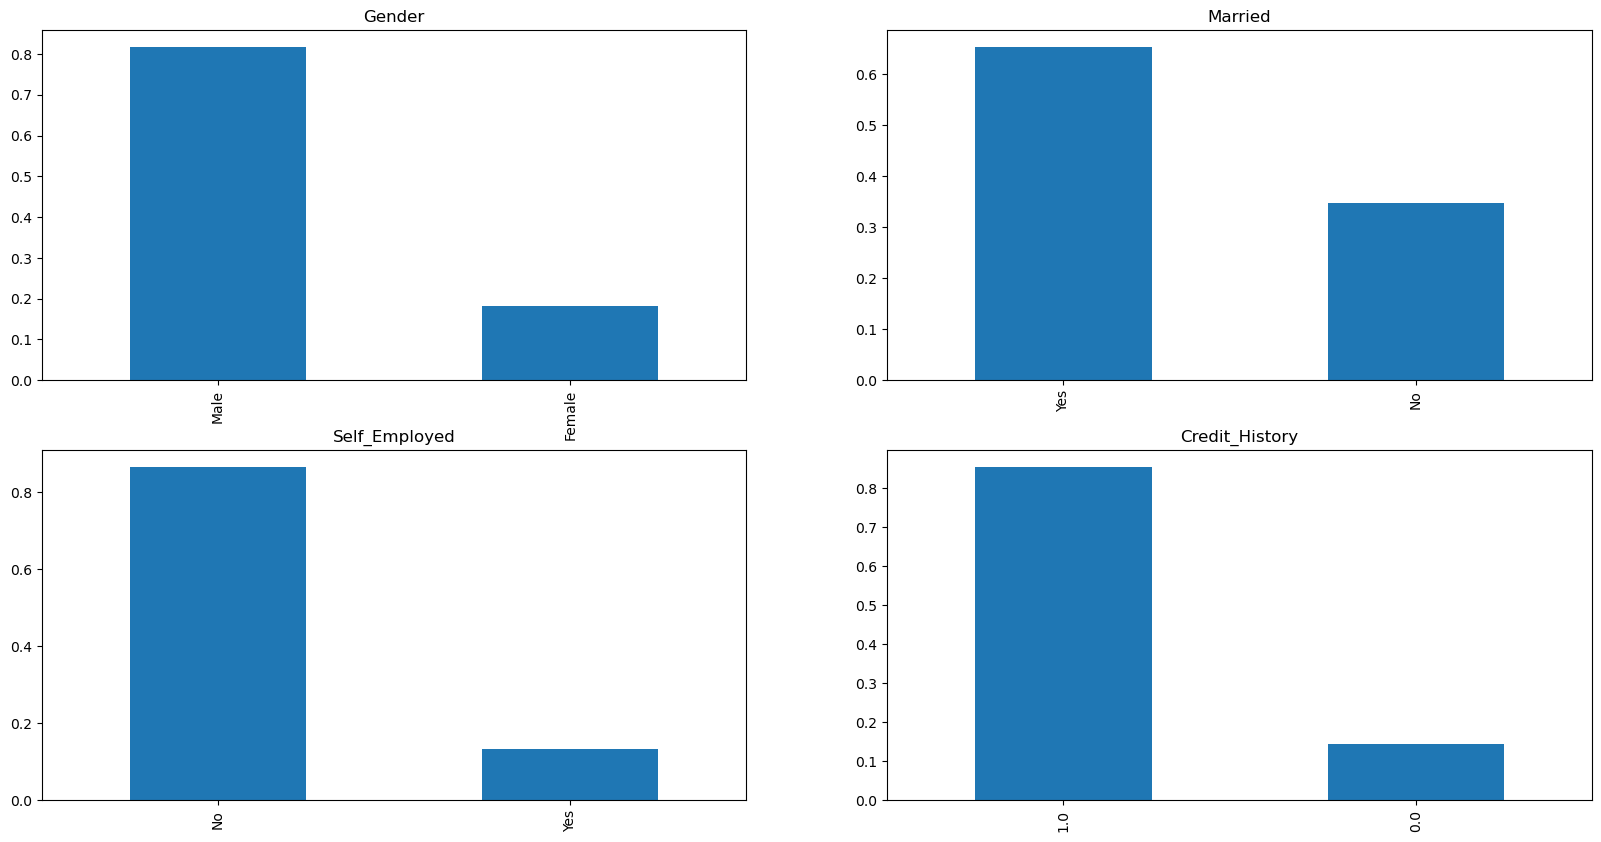

In [23]:
plt.subplot(221) 
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df_train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df_train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

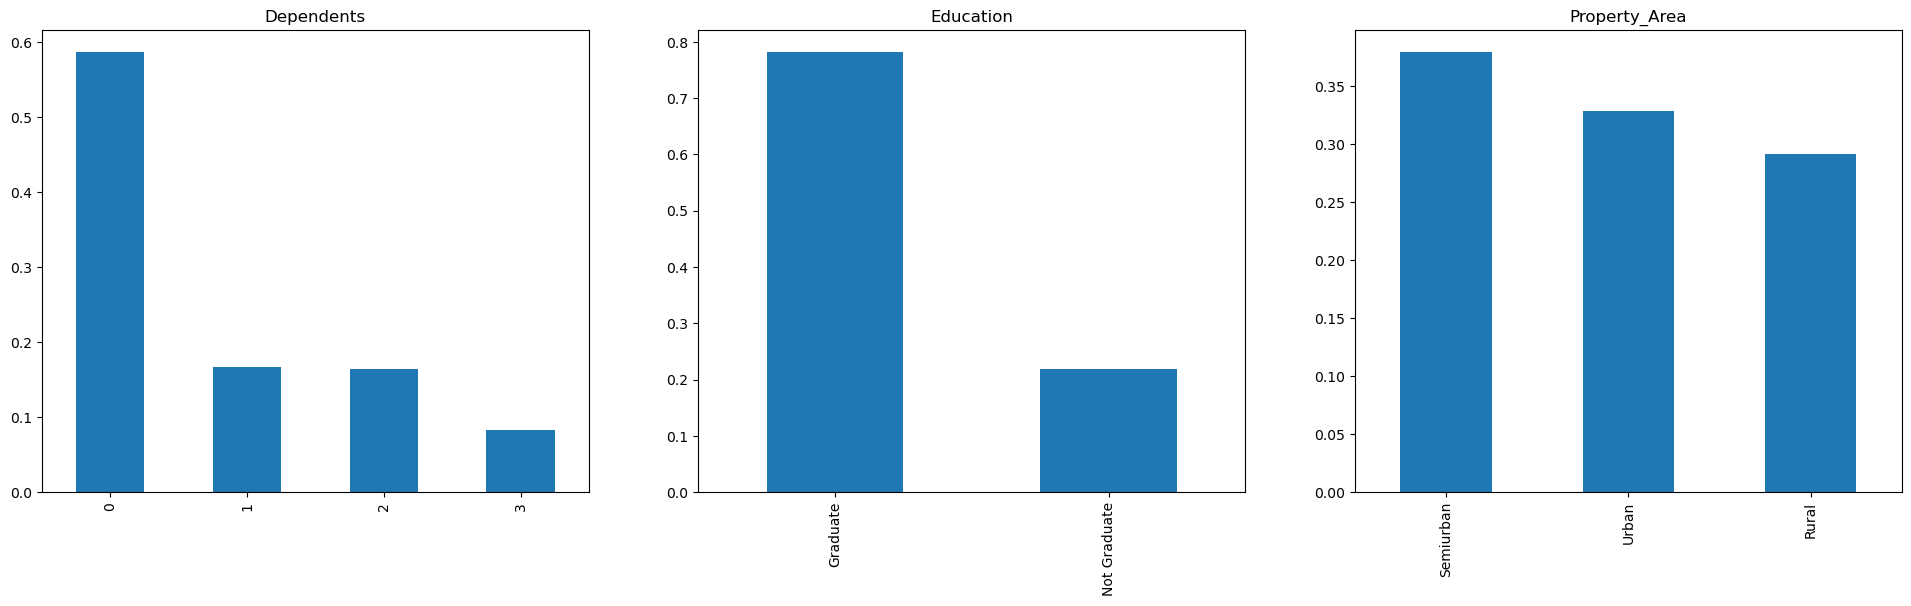

In [24]:
plt.subplot(131)
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
df_train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

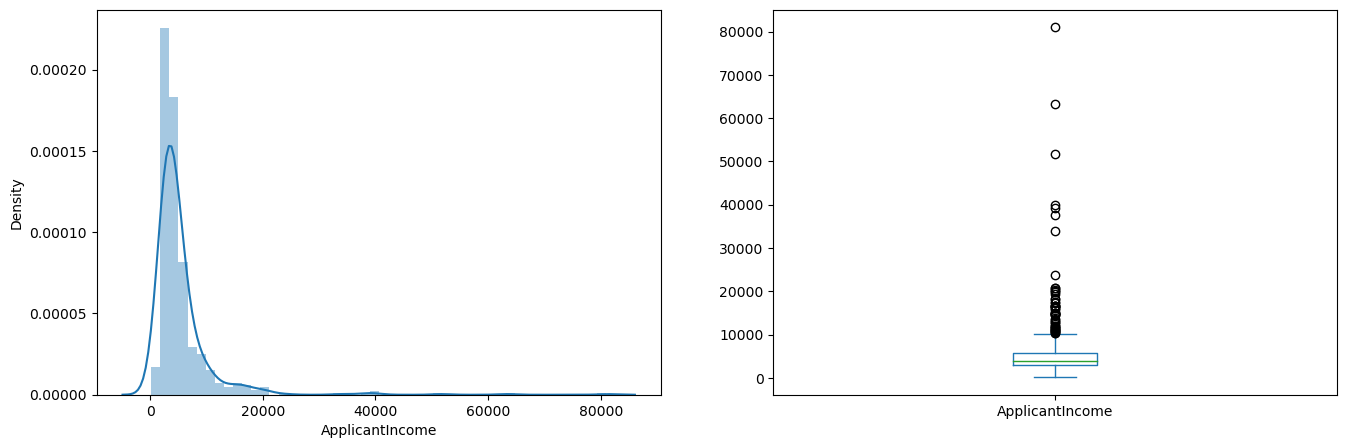

In [25]:
 plt.subplot(121) 
sns.distplot(df_train['ApplicantIncome']); 
plt.subplot(122) 
df_train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

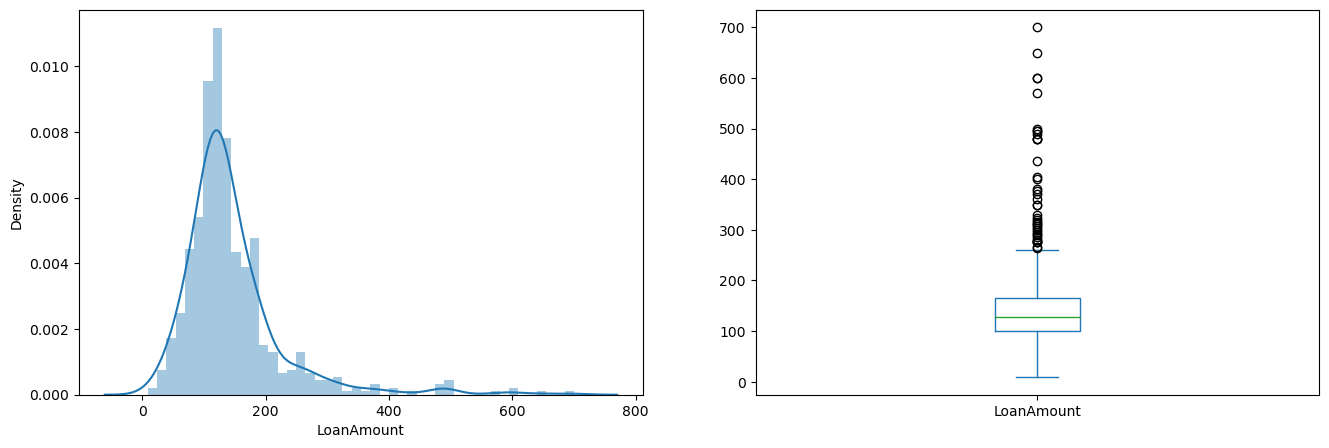

In [26]:
plt.subplot(121)
sns.distplot(df_train['LoanAmount']); 
plt.subplot(122)
df_train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

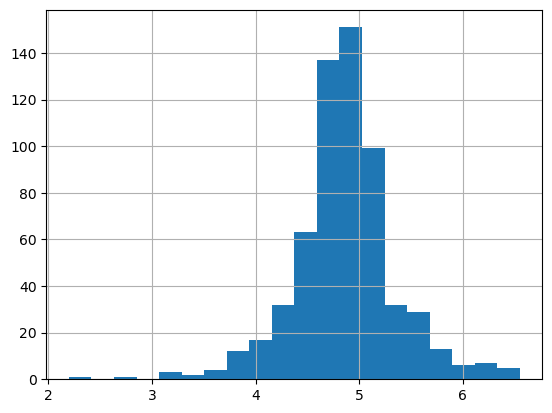

In [27]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount']) 
df_train['LoanAmount_log'].hist(bins=20) 
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

In [28]:
df_train=df_train.drop('Loan_ID',axis=1)
df_test=df_test.drop('Loan_ID',axis=1)

In [29]:
y=df_train.Loan_Status
x=df_train.drop('Loan_Status',1)

In [30]:
x=pd.get_dummies(x) 
df_train=pd.get_dummies(df_train) 
df_test=pd.get_dummies(df_test)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cls=LogisticRegression()
model=cls.fit(x_train,y_train)

In [33]:
y_pred=model.predict(x_test)
print('ACCURACY=',accuracy_score(y_test,y_pred))

ACCURACY= 0.7513513513513513


In [34]:
pred_df_test = model.predict(df_test)

In [35]:
RESULT=pd.read_csv('C:\\Users\\user\\Desktop\\sample_submission_49d68Cx.csv')

In [36]:
RESULT['Loan_Status']=pred_df_test 
RESULT['Loan_ID']=test_original['Loan_ID']

In [37]:
RESULT['Loan_Status'].replace(0,'N',inplace=True) 
RESULT['Loan_Status'].replace(1,'Y',inplace=True)

In [39]:
pd.DataFrame(RESULT,columns=['Loan_ID','Loan_Status']).to_csv('STATUS.csv',index=False)

In [40]:
Z=pd.read_csv('C:\\Users\\user\\Desktop\\STATUS.csv')

In [41]:
x =df_train.drop('Loan_Status',1) 
y =df_train.Loan_Status

In [42]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
i=1 
kf =StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for df_train_index,df_test_index in kf.split(x,y): 
    print('n{}of kfold{}'.format(i,kf.n_splits)) 
    xtr,xvl = x.loc[df_train_index],x.loc[df_test_index] 
    ytr,yvl = y[df_train_index],y[df_test_index] 
    model = tree.DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr) 
    pred_df_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_df_test) 
    print('accuracy_score',score) 
    i+=1 
pred_df_test = model.predict(df_test) 

n1of kfold5
accuracy_score 0.6991869918699187
n2of kfold5
accuracy_score 0.7398373983739838
n3of kfold5
accuracy_score 0.7154471544715447
n4of kfold5
accuracy_score 0.7235772357723578
n5of kfold5
accuracy_score 0.6721311475409836


In [43]:
RESULT['Loan_Status']=pred_df_test            
RESULT['Loan_ID']=test_original['Loan_ID'] 
RESULT['Loan_Status'].replace(0, 'N',inplace=True) 
RESULT['Loan_Status'].replace(1, 'Y',inplace=True)

In [44]:
pd.DataFrame(RESULT, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv',index=False)

In [45]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for df_train_index,df_test_index in kf.split(x,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = x.iloc[df_train_index],x.iloc[df_test_index]
     ytr,yvl = y.iloc[df_train_index],y.iloc[df_test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_df_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_df_test)
     print('accuracy_score',score)
     i+=1
pred_df_test = model.predict(df_test)
pred=model.predict_proba(xvl)[:,1]
        

n1 of kfold 5
accuracy_score 0.8048780487804879
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7804878048780488
n4 of kfold 5
accuracy_score 0.7886178861788617
n5 of kfold 5
accuracy_score 0.7950819672131147


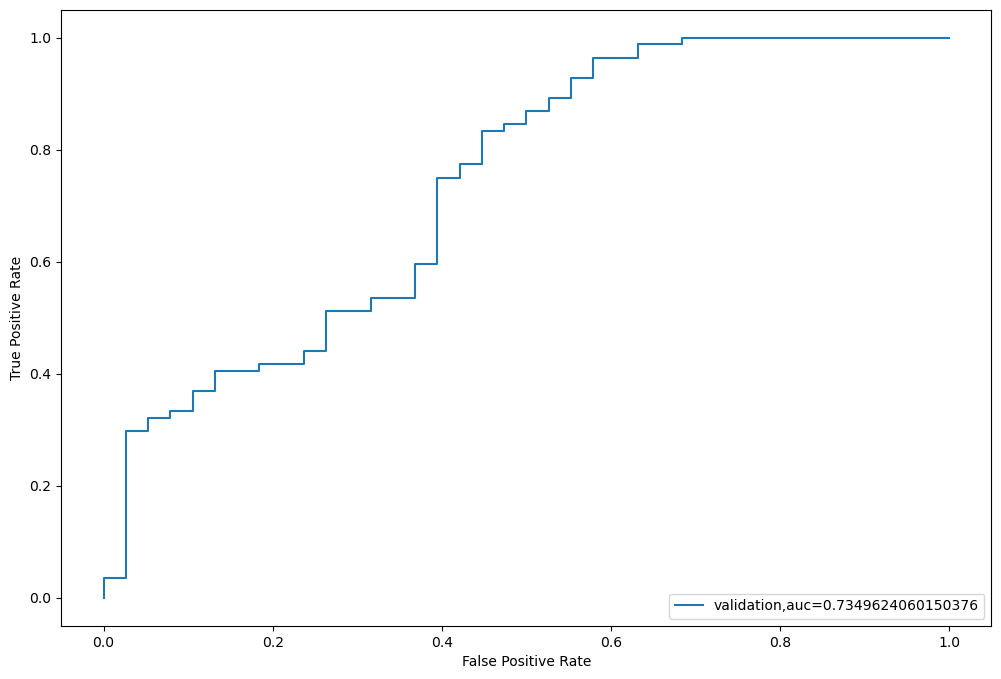

In [46]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [47]:
RESULT['Loan_Status']=pred_df_test
RESULT['Loan_ID']=test_original['Loan_ID'] 

In [48]:
RESULT['Loan_Status'].replace(0, 'N',inplace=True) 
RESULT['Loan_Status'].replace(1, 'Y',inplace=True)

In [49]:
pd.DataFrame(RESULT,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv',index=False)